# Lecture 2 - Pkg.jl, DifferentialEquations.jl, Git and GitHub

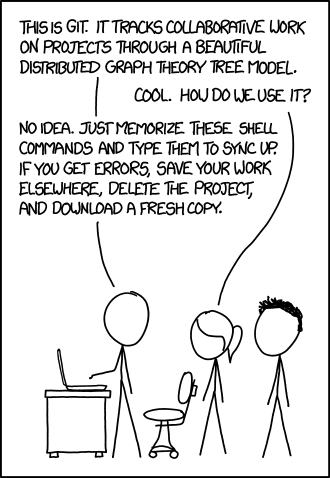
Source: [xkcd](https://xkcd.com/1597/)

## Contents
1. [Pkg.jl - The Julia Package Manager](#pkg)
2. [DifferentialEquations.jl](#diff-eq)
3. [Git and GitHub](#git)
4. [Further Reading](#further-reading)
5. [Next Time](#next-time)

## 1. [Pkg.jl](https://pkgdocs.julialang.org/v1/) - The Julia Package Manager <a class="anchor" id="pkg"></a>

### 1.1. First Things First: Some Terminology

#### 1.1.1. What's a Package?

- A package is a Julia project that provides some **reusable functionality** that can be used by other Julia projects.
<br>

- In other words, someone has written some useful code which provides specific functionality and made that code available to others (publicly or privately) as a self-contained package.
<br>

- For example, [DifferentialEquations.jl](https://diffeq.sciml.ai/stable/) provides a huge number of utilities for the numerical solution of differential equations.

#### 1.1.2. What's a Programming Environment?

- In general, the programming environment is the entire **context** in which your code is executed.
<br>

- This includes **all software and hardware** available to your programme, as well as [environment variables](https://en.wikipedia.org/wiki/Environment_variable).
<br>

- To ensure the **portability** and **reproducibility** of your code, it is important to carefully manage and control your programming environment.
<br>

- In this lecture, when talking about programming environments, we will be mostly concerned with **Julia packages**. In other words, we want to control what Julia packages, and in what versions, are available to our programme at runtime.

### 1.2. Pkg.jl

- [Pkg.jl](https://pkgdocs.julialang.org/v1/) is Julia's built-in package manager.
<br>

- It's comparable to the combination of `pip` and `virtualenv`, or `conda`, in Python. Except it actually works.
<br>

- Pkg.jl is built around the idea of environments. 
<br>

- A complete Julia environment consists of:
    1. A specific version of Julia, and
    2. A set of Julia packages and their versions.
<br><br>

- Aside: package versions usually follow [semantic versioning](https://semver.org/).
<br>

- A Julia environment can be defined by two files: `Project.toml` and `Manifest.toml`.
<br>

- `Project.toml` contains metadata describing the project at a **high level**, including dependencies. A Julia environment can be created from `Project.toml` alone.
<br>

- `Manifest.toml` is a **complete record** of the packages in an environment, including both direct dependencies (installed by you) and indirect dependencies (dependencies of your dependencies), **along with their versions**. It also contains information about the Julia version that was used to create the environment.
<br>

- Therefore, **a definitive and absolute Julia environment can be fully recreated using the manifest file.**
<br>

- This means you can **ensure reproducibility of your code** by checking the `Manifest.toml` file into version control, e.g. Git (more on this later).

### 1.3. The Pkg.jl REPL

- Aside: a [read-eval-print-loop (REPL)](https://en.wikipedia.org/wiki/Read%E2%80%93eval%E2%80%93print_loop) is simply an interactive programming environment.
<br>

- From the Julia REPL, enter the Pkg REPL by typing `]`.
<br>

- You'll know you're in the Pkg REPL because the prompt will change from `julia>` to something like `(@v1.9) pkg>`.
<br>

- In parentheses you can see the active environment. The active environment is the specific Julia environment that will be modified by `Pkg.jl` commands.
<br>

- To see a list of all the possible commands in the Pkg REPL, simply type `?` and press Enter. Alternatively, see the [REPL Mode Reference](https://pkgdocs.julialang.org/v1/repl/) for the Pkg.jl docs.
<br>

- To demonstrate some of these commands, we'll first create an empty Julia project.


#### 1.3.1. `generate` - Create a New Julia Package

- To create a new Julia project, for example `Lecture2.jl`, do:

    `(@v1.9) pkg> generate Lecture2.jl`<br><br>

- This creates a new directory called `Lecture2.jl` in the current directory. The new directory `Lecture2.jl` contains the files `Project.toml` and `src/Lecture2.jl`.
<br>

- In a later lecture, we'll use [PkgTemplates.jl](https://github.com/invenia/PkgTemplates.jl) for this, which offers similar but more full-featured functionality.

#### 1.3.2. `activate` - Activate a Julia Environment

- The active environment appears in parentheses in the Pkg REPL. This is where new packages will be installed.
<br>

- Activate a Julia environment in the current directory by doing:

    `activate .`<br><br>

- If a Julia environment doesn't already exist in the current directory, it will be created.
<br>

- You can also activate a Julia environment by name, e.g.

    `activate Lecture2.jl`<br><br>


- You can provide `activate` with a path to any Julia environment - it doesn't have to be in the current directory.

#### 1.3.3. `add` and `rm` - Add and Remove Dependencies

- To add a package `A` to your environment, simply do `add A`. For example:

    `(Lecture2) pkg> add DifferentialEquations`<br><br>


- It can then immediately be used in your code by doing `using A`. More on this later, see [code loading](https://docs.julialang.org/en/v1/manual/code-loading/).
<br>

- Removing a package is as simple as `rm A`, e.g.

    `(Lecture2) pkg> rm DifferentialEquations`

#### 1.3.4. `up` - Upgrade Dependencies

- Upgrade packages using `up`. For example:


    `(Lecture2) pkg> up Example`<br><br>


- To upgrade all packages in `Manifest.toml`, do:

    `(Lecture2) pkg> up`


#### 1.3.5. `resolve` - Resolve a Project

- Given a set of explicit dependencies, `resolve` finds a complete set of compatible dependencies and updates the `Manifest.toml` file.


#### 1.3.6. `instantiate` - Download Dependencies

- Sometimes you will want to modify someone else's code or collaborate with others on an existing project.
<br>

- The first step will be to clone the Git repository to your computer - more on this later.
<br>

- Cloning the repository simply puts the code for the project on your computer; in order to use the project, you'll also need to download the dependencies.
<br>

- First, enter the project directory and activate the environment:

    `(Lecture2) pkg> activate .`<br><br>

- Then, to download all of the dependencies in `Manifest.toml`, instantiate the environment: 

    `(Lecture2) pkg> instantiate`<br><br>

- If no `Manifest.toml` exists for the current environment, Julia will first resolve the environment and populate the `Manifest.toml` before downloading the dependencies.


#### 1.3.7. Other Useful Pkg Commands

- `status` - Show the status of the current environment. 
<br>

- `?` - Get help.

### 1.4. The Pkg.jl API

- Everything we've done so far as been in interactive mode (i.e. using the Pkg REPL). As you develop Julia packages, this will be the most common way in which you interact with Pkg.jl.
<br>

- However, sometimes you may wish to interact with the package manager from within a script (or a Jupyter notebook). For this, you need to use the [Pkg API](https://pkgdocs.julialang.org/v1/api/). For example:

In [1]:
using Pkg
Pkg.activate(".")
Pkg.add("DifferentialEquations")

  Activating project at `~/Nextcloud/TUM-Dynamics-Lecture/lectures/lecture-2`
   Resolving package versions...
  No Changes to `~/Nextcloud/TUM-Dynamics-Lecture/lectures/lecture-2/Project.toml`
  No Changes to `~/Nextcloud/TUM-Dynamics-Lecture/lectures/lecture-2/Manifest.toml`
Precompiling project...
  ✓ EpollShim_jll
  ✓ Xorg_libXau_jll
  ✓ LLVMOpenMP_jll
  ✓ Bzip2_jll
  ✓ libpng_jll
  ✓ fzf_jll
  ✓ LERC_jll
  ✓ libfdk_aac_jll
  ✓ LAME_jll
  ✓ JpegTurbo_jll
  ✓ Xorg_libXdmcp_jll
  ✓ mtdev_jll
  ✓ gperf_jll
  ✓ libaom_jll
  ✓ Expat_jll
  ✓ Xorg_libSM_jll
  ✓ Opus_jll
  ✓ Xorg_xtrans_jll
  ✓ libvorbis_jll
  ✓ libevdev_jll
  ✓ Xorg_libpthread_stubs_jll
  ✓ Libuuid_jll
  ✓ Wayland_protocols_jll
  ✓ FriBidi_jll
  ✓ Gettext_jll
  ✓ FreeType2_jll
  ✓ Pixman_jll
  ✓ eudev_jll
  ✓ JLFzf
  ✓ Wayland_jll
  ✓ Libtiff_jll
  ✓ Xorg_libxcb_jll
  ✓ Xorg_libX11_jll
  ✓ Xorg_xcb_util_jll
  ✓ Glib_jll
  ✓ Xorg_libXext_jll
  ✓ Xorg_libXrender_jll
  ✓ Xorg_libXfixes_jll
  ✓ Fontconfig_jll
  ✓ Xorg_libXine

## 2. [DifferentialEquations.jl](https://diffeq.sciml.ai/stable/) <a class="anchor" id="diff-eq"></a>

- DifferentialEquations.jl is a comprehensive suite of algorithms for the numerical solution of differential equations in Julia.

### 2.1. Solving ODEs with DifferentialEquations.jl

- DifferentialEquations.jl offers a straightforward API for solving ODEs.
<br>

- First, you need to make sure DifferentialEquations.jl is installed.

In [17]:
using Pkg
Pkg.activate(".")
Pkg.add("DifferentialEquations")

  Activating project at `~/code/Lecture2.jl`
   Resolving package versions...
  No Changes to `~/code/Lecture2.jl/Project.toml`
  No Changes to `~/code/Lecture2.jl/Manifest.toml`


- Then, to use the functionality defined by DifferentialEquations.jl, you first need to import the package. This is most commonly done with the `using` keyword, although see [here](https://docs.julialang.org/en/v1/manual/code-loading/) for other options and the full details of code loading in Julia.

In [2]:
using DifferentialEquations

- With all of this done, solving an ODE in Julia is a simple 3-step process.

#### Step 1: Define the RHS of your ODE

- For a standard ODE of the form

$$\dot u = f(u, t; p),$$

where $u \in \mathbb R^n$, $t \in \mathbb R$, $p \in \mathbb R^m$, $f :\mathbb R^n \times \mathbb R \to \mathbb R^n$, we need to define $f$.

In [3]:
# Lorenz '63 (OOP)
function f(u, p, t)
    x, y, z = u
    σ, β, ρ = p
    
    dx = σ * (y - x)
    dy = x * (ρ - z) - y
    dz = x * y - β * z
    
    return [dx, dy, dz]
end

f (generic function with 1 method)

#### Step 2: Set up the ODE Problem

In [13]:
u0 = rand(3)             # Initial conditions
tspan = (0.0, 10.0)      # Timespan of the integration
p = [10.0, 8 / 3, 28.0]  # Parameters (optional)

prob = ODEProblem(f, u0, tspan, p)

ODEProblem with uType Vector{Float64} and tType Float64. In-place: false
timespan: (0.0, 10.0)
u0: 3-element Vector{Float64}:
 0.4263121913002924
 0.2123242121744825
 0.7473957891163804

#### Step 3: Solve the ODE Problem

In [14]:
sol = solve(prob)

  219.834 μs (9492 allocations: 830.12 KiB)


retcode: Success
Interpolation: 3rd order Hermite
t: 104-element Vector{Float64}:
  0.0
  0.032127765672898254
  0.05358575883826023
  0.0892467784349894
  0.12549133296520804
  0.17440866588568077
  0.2239723589595432
  0.27526753943126897
  0.32781519956080707
  0.38165545838738446
  0.4361420685029125
  0.48540347730400846
  0.5324490463001591
  ⋮
  9.000141406514514
  9.086509583245748
  9.162588412050647
  9.239017015451962
  9.327403112368929
  9.403190995888073
  9.496520501219347
  9.613831696169722
  9.705907744460836
  9.814593109891133
  9.900971895353893
 10.0
u: 104-element Vector{Vector{Float64}}:
 [0.4263121913002924, 0.2123242121744825, 0.7473957891163804]
 [0.418458671154167, 0.561725882839752, 0.6909930335452774]
 [0.4701066301676223, 0.8055983274732276, 0.658865934839977]
 [0.6460093035729688, 1.303707788408507, 0.6189081708035143]
 [0.9553921435519467, 2.026739293530935, 0.6075440437353244]
 [1.671554617120257, 3.603605849960454, 0.7003461084806695]
 [2.966671196991

In [6]:
Array(sol)

3×105 Matrix{Float64}:
 0.870277  0.948483  1.13153   1.68368   …  -9.62641  -6.10678  -5.1523
 0.700896  1.52036   2.13073   3.50516      -5.74185  -3.37552  -3.52744
 0.912789  0.863756  0.854392  0.916231     32.603    27.8944   25.606

#### Alternative: In-Place Updates

- So far we've defined and solved our problem in the out-of-place (OOP) form.
<br>

- Often it is more efficient to define the problem in the in-place (IIP) form.

In [8]:
# Lorenz '63 (IIP)
function f!(du, u, p, t)
    x, y, z = u
    σ, β, ρ = p
    
    du[1] = σ * (y - x)
    du[2] = x * (ρ - z) - y
    du[3] = x * y - β * z
    
    return nothing
end

f! (generic function with 1 method)

In [9]:
prob = ODEProblem(f!, u0, tspan, p)

ODEProblem with uType Vector{Float64} and tType Float64. In-place: true
timespan: (0.0, 10.0)
u0: 3-element Vector{Float64}:
 0.8702771956805331
 0.7008962731391553
 0.912788518753543

In [10]:
solve(prob)

retcode: Success
Interpolation: 3rd order Hermite
t: 105-element Vector{Float64}:
  0.0
  0.03569572704340707
  0.05900387787036569
  0.09864482466312677
  0.13874167945009291
  0.1867810615295074
  0.23414881051911626
  0.28486544502191646
  0.3364534555679068
  0.3882166678387201
  0.4325003729425962
  0.4777469392370556
  0.528633284267643
  ⋮
  8.938338680678546
  9.038145848007304
  9.149884254767349
  9.237593988040453
  9.335131162287414
  9.433985250733032
  9.56124003180655
  9.657144443920261
  9.769965935808473
  9.858538397767369
  9.956205657265514
 10.0
u: 105-element Vector{Vector{Float64}}:
 [0.8702771956805331, 0.7008962731391553, 0.912788518753543]
 [0.9484833864204189, 1.5203577046944108, 0.8637556340834884]
 [1.131530394547163, 2.130729024530558, 0.854392187505201]
 [1.6836754896796, 3.5051585106976746, 0.9162307483402198]
 [2.6321182137116077, 5.616314235808365, 1.1940085842531196]
 [4.543761697008403, 9.684745531546211, 2.2746105602323805]
 [7.687157036196214, 15.

In [11]:
Pkg.add("BenchmarkTools")

   Resolving package versions...
  No Changes to `~/Nextcloud/TUM-Dynamics-Lecture/lectures/lecture-2/Project.toml`
  No Changes to `~/Nextcloud/TUM-Dynamics-Lecture/lectures/lecture-2/Manifest.toml`


In [12]:
using BenchmarkTools
@btime solve(prob)  # experiment with this yourself

  111.625 μs (2271 allocations: 277.80 KiB)


retcode: Success
Interpolation: 3rd order Hermite
t: 105-element Vector{Float64}:
  0.0
  0.03569572704340707
  0.05900387787036569
  0.09864482466312677
  0.13874167945009291
  0.1867810615295074
  0.23414881051911626
  0.28486544502191646
  0.3364534555679068
  0.3882166678387201
  0.4325003729425962
  0.4777469392370556
  0.528633284267643
  ⋮
  8.938338680678546
  9.038145848007304
  9.149884254767349
  9.237593988040453
  9.335131162287414
  9.433985250733032
  9.56124003180655
  9.657144443920261
  9.769965935808473
  9.858538397767369
  9.956205657265514
 10.0
u: 105-element Vector{Vector{Float64}}:
 [0.8702771956805331, 0.7008962731391553, 0.912788518753543]
 [0.9484833864204189, 1.5203577046944108, 0.8637556340834884]
 [1.131530394547163, 2.130729024530558, 0.854392187505201]
 [1.6836754896796, 3.5051585106976746, 0.9162307483402198]
 [2.6321182137116077, 5.616314235808365, 1.1940085842531196]
 [4.543761697008403, 9.684745531546211, 2.2746105602323805]
 [7.687157036196214, 15.

### 2.2. Plotting the Solution with Plots.jl

- DifferentialEquations.jl provides recipes for plotting ODE solutions using the Plots.jl package.
<br>

- First, make sure the Plots.jl package is installed and imported.

In [15]:
Pkg.add("Plots")
using Plots

   Resolving package versions...
  No Changes to `~/Nextcloud/TUM-Dynamics-Lecture/lectures/lecture-2/Project.toml`
  No Changes to `~/Nextcloud/TUM-Dynamics-Lecture/lectures/lecture-2/Manifest.toml`
[ Info: Precompiling IJuliaExt [2f4121a4-3b3a-5ce6-9c5e-1f2673ce168a]


- Then, plotting trajectories is as simple as calling `plot` with the solution object.

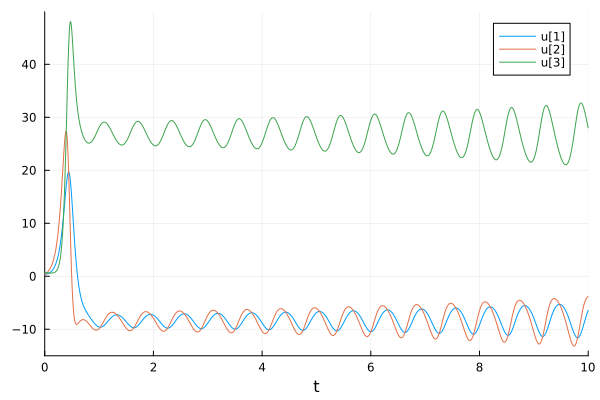

In [16]:
plot(sol)

### 2.3. Configuring the Solver: Common Solver Options

- When we solved our ODE problem just now, we simply called `solve(prob)` and allowed DifferentialEquations.jl to choose sensible defaults for the ODE solver algorithm and various other important parameters.
<br>

- In practice, we will often want to specify the precise behaviour of the solver.


#### 2.3.1. Specifying the Solver Algorithm

- A huge number of [ODE solvers](https://diffeq.sciml.ai/stable/solvers/ode_solve/) are included with DifferentialEquations.jl.
<br>

- To specify a specific algorithm, simply pass it as the second argument to `solve`.

In [17]:
solve(prob, Tsit5())

retcode: Success
Interpolation: specialized 4th order "free" interpolation
t: 100-element Vector{Float64}:
  0.0
  0.032127765672898254
  0.05358575883826023
  0.0892467784349894
  0.12549133296520804
  0.17440866588568077
  0.2239723589595432
  0.27526753943126897
  0.32781519956080707
  0.38165545838738446
  0.4361420685029125
  0.48540347730400846
  0.5324490463001591
  ⋮
  8.892832515575815
  9.005921988349078
  9.112576250456366
  9.218666834720844
  9.308135834051214
  9.403089130425093
  9.504914861851367
  9.631585150569594
  9.730538024071379
  9.842498829122569
  9.93005930422119
 10.0
u: 100-element Vector{Vector{Float64}}:
 [0.4263121913002924, 0.2123242121744825, 0.7473957891163804]
 [0.418458671154167, 0.561725882839752, 0.6909930335452774]
 [0.4701066301676223, 0.8055983274732276, 0.658865934839977]
 [0.6460093035729688, 1.303707788408507, 0.6189081708035143]
 [0.9553921435519467, 2.026739293530935, 0.6075440437353244]
 [1.671554617120257, 3.603605849960454, 0.7003461084

- To use a fixed stepsize algorithm, you'll also have to pass the stepsize `dt` as a keyword argument to `solve`

In [18]:
solve(prob, Euler(), dt = 0.01)

retcode: Success
Interpolation: 3rd order Hermite
t: 1001-element Vector{Float64}:
  0.0
  0.01
  0.02
  0.03
  0.04
  0.05
  0.060000000000000005
  0.07
  0.08
  0.09
  0.09999999999999999
  0.10999999999999999
  0.11999999999999998
  ⋮
  9.889999999999834
  9.899999999999833
  9.909999999999833
  9.919999999999833
  9.929999999999833
  9.939999999999833
  9.949999999999832
  9.959999999999832
  9.969999999999832
  9.979999999999832
  9.989999999999831
 10.0
u: 1001-element Vector{Vector{Float64}}:
 [0.4263121913002924, 0.2123242121744825, 0.7473957891163804]
 [0.40491339338771143, 0.3263821442505514, 0.7283703987415256]
 [0.39706026847399545, 0.4335448036586292, 0.7102687531241147]
 [0.4007087219924588, 0.5375660357767201, 0.6930496872021671]
 [0.41439445337088493, 0.6416117070324808, 0.6767224362019357]
 [0.4371161787370445, 0.7484217366656667, 0.6613353078960049]
 [0.4682467345299067, 0.8604392457188687, 0.6469711721815952]
 [0.507465985648803, 0.9799145175429637, 0.633747586260778

#### 2.3.2. Save Times

- By default, an adaptive step size algorithm will simply save the result at the times where it stopped.
<br>

- Often, you'll want the solver to output the solution at predefined times. To do this, use the keyword argument `saveat`.

In [19]:
sol = solve(prob, Tsit5(), saveat = 0.1)

retcode: Success
Interpolation: 1st order linear
t: 101-element Vector{Float64}:
  0.0
  0.1
  0.2
  0.3
  0.4
  0.5
  0.6
  0.7
  0.8
  0.9
  1.0
  1.1
  1.2
  ⋮
  8.9
  9.0
  9.1
  9.2
  9.3
  9.4
  9.5
  9.6
  9.7
  9.8
  9.9
 10.0
u: 101-element Vector{Vector{Float64}}:
 [0.4263121913002924, 0.2123242121744825, 0.7473957891163804]
 [0.7225473635642884, 1.4899272236064263, 0.611538125827453]
 [2.2478724101473513, 4.851643507277324, 0.8582889661145153]
 [7.03436808146263, 14.76134482689518, 4.503572215763315]
 [17.467059927346043, 27.268985771521795, 28.893907546722637]
 [14.375796680132048, -0.9964422118862988, 46.10446712869071]
 [0.39298118778292235, -9.030588061137138, 31.862094477019482]
 [-5.2006093074106055, -8.186143346227066, 26.64892829657194]
 [-7.260658968304828, -8.840189189449623, 25.140450701928525]
 [-8.70449166494679, -9.989137844983226, 25.95218039586742]
 [-9.580242040138533, -9.894497802687468, 28.069415510442198]
 [-9.215139878239691, -8.255641689338965, 29.09530

- This does **not** force the adaptive solver to stop at those times. Instead, the solution at intermediate times is calculated using an efficient interpolation function which, it can be shown, preserves the order of the solution.

In [20]:
sol = solve(prob, Tsit5(), saveat = 1:0.01:2)

retcode: Success
Interpolation: 1st order linear
t: 101-element Vector{Float64}:
 1.0
 1.01
 1.02
 1.03
 1.04
 1.05
 1.06
 1.07
 1.08
 1.09
 1.1
 1.11
 1.12
 ⋮
 1.89
 1.9
 1.91
 1.92
 1.93
 1.94
 1.95
 1.96
 1.97
 1.98
 1.99
 2.0
u: 101-element Vector{Vector{Float64}}:
 [-9.580242040138533, -9.894497802687468, 28.069415510442198]
 [-9.60483583666127, -9.780437505118094, 28.261980629321435]
 [-9.615333509187487, -9.649694026591424, 28.439574786823577]
 [-9.611579448472224, -9.50389759656952, 28.599816362366543]
 [-9.593623290896312, -9.345000524173358, 28.74055981619632]
 [-9.561719918466366, -9.175277198182831, 28.85989568938699]
 [-9.51632945881479, -8.997324087036747, 28.956150603840687]
 [-9.458084478719973, -8.813921675019744, 29.02807235634746]
 [-9.387765261730445, -8.627508215949737, 29.07536424253246]
 [-9.306408768759196, -8.44061330086993, 29.097763977046892]
 [-9.215139878239691, -8.255641689338965, 29.095307172653072]
 [-9.115159922212744, -8.074844287352764, 29.06836841475

### 2.3.3. Error Tolerances

- As you saw earlier, adaptive step size algorithms choose the step size such that the estimated local error at each step remains below some user-defined tolerance.
<br>

- In general, it is required that the normalised error estimate satisfies componentwise

$$\mathrm{err_i} \leq \mathrm{abstol_i} + \max(|y_{0i}|, |y_{1i}|) \cdot \mathrm{reltol_i},$$

where $|y_{0i}|$ is the initial value, $|y_{1i}|$ is the solver's estimate of the solution, $\mathrm{abstol_i}$ is the *absolute tolerance* and $\mathrm{reltol_i}$ is the *relative tolerance*.


- The relative tolerance scales with the solution, so you can interpret a relative tolerance of `1e-3` as meaning, roughly, that the solution is (locally) correct to 3 digits.
<br>

- On the other hand, the absolute tolerance controls the (local) error of the solution around zero.
<br>

- Control the stepping behaviour with the `abstol` and `reltol` keyword arguments to `solve`.

In [21]:
@btime solve(prob, Tsit5(), reltol = 1e-9, abstol = 1e-9);

  1.789 ms (109237 allocations: 8.44 MiB)


In [22]:
@btime solve(prob, Tsit5(), reltol = 1e-6, abstol = 1e-6);

  444.291 μs (27691 allocations: 2.15 MiB)


## 3. Git and GitHub Basics <a class="anchor" id="git"></a>
### 3.1. First Things First: Some Terminology
#### 3.1.1. Version Control
- Version control is software for tracking changes across a set of files over time.
<br>

- Version control allows you to see:
    - what changes were made, 
    - when they were made, and,
    - who made them.<br><br>


- With this information in hand, it is then straightforward to revert the project to a previous state if, for example, recent changes have introduced a bug.


#### 3.1.2. Repository
- A repository, or "repo", is a collection of files tracked by a version control system.
<br>

- A single repository will typically correspond to a particular folder/directory on your computer containing a single project.
<br>

- You can think of a repository as the largest unit of code that is tracked by version control.

### 3.2. Wait, What's the Difference Between Git and GitHub?
- [Git](https://git-scm.com/) is software for version control (it's free and open source!).
<br>

- [GitHub](https://github.com/) is a website for hosting Git repositories. 
<br>

- While Git is distributed version control by design, in practice it is often employed much like a centralised version control system, with the centralised, "remote" repository hosted on GitHub (or one of many other [alternatives](https://itsfoss.com/github-alternatives/)). Typically, developers clone the remote repository to their local machine, where they make changes, commit them, and then "push" those changes back upstream to the remote repository.

- All registered Julia packages that can be installed directly with Pkg.jl are hosted on GitHub. We want you to do your projects in the end of the class on GitHub/GitLab as well. 

### 3.3. Creating a New Git Repository and Hosting it on GitHub
- So you want to start a new project and track your changes using Git and GitHub. 
<br>

- There are two equivalent ways of creating a new Git repo hosted on GitHub.


#### 3.3.1. Create a Repository on Your Computer and Clone it to GitHub

1. To create a Git repository from an existing project, simply do `git init` in the project directory on your computer.
<br>

2. Go to your GitHub homepage and, in the top left-hand corner, click on the green "New" button:

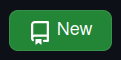

3. On the next page, follow the instructions to create an empty repository and click "Create repository".
<br>

4. On the next page, follow the instructions to "push an existing repository from the command line".


#### 3.3.2. Create a Repository on GitHub and Clone it to Your Computer

1. Go to GitHub and create a new repository. This time you don't have to create it empty; you can initialise the repository with a `README` file, a `.gitignore` file, and an apppropriate license. 
<br>

2. Once you've created the repository, click on the green "Code" button and copy and paste the SSH URL of the repo:

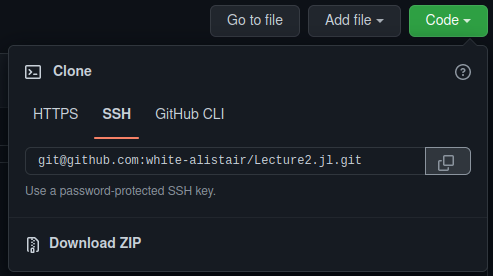

3. Then, on your computer, in the directory where you wish to clone the repository, simply do:

`git clone git@github.com:white-alistair/Lecture2.jl.git`

This will create a new directory with the name of the repository.

### 3.4. The Three States of a File, According to Git

- This section closely follows the treatment given [here](https://git-scm.com/book/en/v2/Getting-Started-What-is-Git%3F) in the excellent [Pro Git](https://git-scm.com/book/en/v2) book.
<br>

- A file tracked by Git can exist in one of three states:

    1. **Modified** means that you have changed the file but have not yet committed those changes to the repository.
    2. **Staged** means that you have changed the file *and* marked the modified file in its current version to go into your next commit snapshot.
    3. **Committed** means that a snapshot has been taken of your changes, which are now safely stored in the repository.<br><br>


- The three states then correspond to the three main sections of a Git project:

    1. The **working directory**: this is where you write code and modify files.
    2. The **staging area** (also called the **index**): this is where you "stage" changes, i.e. mark them ready to be commited.
    3. The **Git directory**.<br><br>
    
    
- Your day-to-day Git workflow will consist, more or less, of moving files between the three states:

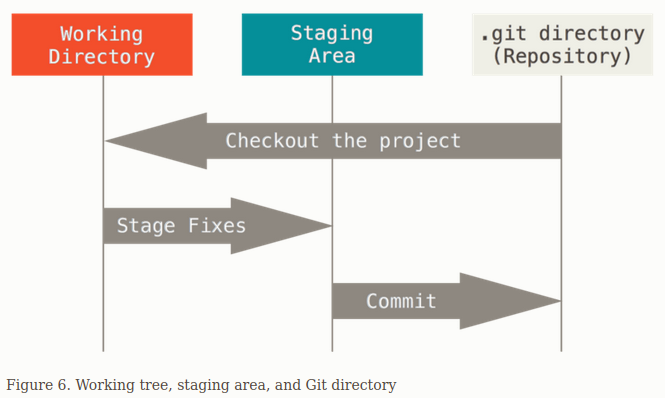
[Source](https://git-scm.com/book/en/v2)


- As you can see, in Git you "save" changes by committing them to your repository. 
<br>

- Think of a Git commit as a snapshot of your entire repository (not just a single file or set of files) at the moment of the commit. Every time you commit, the exact state of your entire repository, including the newly modified contents of your index, is saved, such that you can always return to the repository exactly as it existed at that time.
<br>

- **Tip**: Git works best when you enable "auto save" in your code editor. That way, the entire concept of saving your work is transferred to Git, and you won't lose any code if, for example, you close your editor without saving or committing your work.

### 3.5. A Basic Git Workflow

- From the theory we now turn to the commands that you will actually use to track your changes in Git.


#### 3.5.1. `git status` - Show the working tree status
- This is a very useful command which you should use often! It summarises the states of all of the files in your project. 
<br>

- From the Git [documentation](https://git-scm.com/docs/git-status):

>Displays paths that have differences between the index file and the current `HEAD` commit, paths that have differences between the working tree and the index file, and paths in the working tree that are not tracked by Git...The first are what you __would__ commit by running git commit; the second and third are what you __could__ commit by running `git add` before running `git commit`.


#### 3.5.2. `git add` - Add file contents to the index

- You have modified a file (or created a new one). To include those changes in the next commit, add them to the index by doing:

    `git add my_changed_file.jl`

#### 3.5.3. `git commit` - Take a snapshot of the current contents of your index

- You've already added all of your desired changes to the index, and you're ready to commit them. You can either do:

    `git commit` (opens your default text editor so you can add a commit message)
    
    or

    `git commit -m "Add equations of motion"` (adds the commit message directly from the command line)<br><br>
    

- The **commit message** summarises the changes contained in the commit.
<br>

- **Tip**: Aim for short and descriptive commit messages. Start with a verb in the imperative form, e.g. `Update README.md` instead of `Updated README.md`. Avoid vague commit messages like `update` or `bugs`. See [here](https://cbea.ms/git-commit/) for an excellent overview of how to write good commit messages.
<br>

- **Tip**: Aim for small and frequent commits, so that you can easily return to any point in your history. See [atomic commits](https://www.freshconsulting.com/insights/blog/atomic-commits/).

#### 3.5.4. `git push` - Add your changes to another repository (e.g. GitHub)

- You've committed your changes to your local Git repo and you want to update the remote GitHub respository as well. Do:

    `git push`<br><br>
    

- A more verbose version is:

    `git push <repository> <branch>`<br><br>
    

- However, `<repository>` defaults to `origin` (most commonly your GitHub repository) and `<branch>` defaults to the current branch, so if you're on the `main` branch then `git push` is equivalent to:

    `git push origin main`


#### 3.5.5. `git pull` - Get changes from another repository (e.g. GitHub)

- There are changes on your upstream GitHub repository which you don't have on your local Git repo (for example, if a collaborator added some code). Get those changes by doing:
    
    `git pull`


#### 3.5.6. `git log` - Show commit logs

- Another very useful command which shows the commit history of your repo. Again, use this one often.

## 4. Further Reading <a class="anchor" id="further-reading"></a>

1. Pkg.jl  
    a. [Documentation](https://pkgdocs.julialang.org/v1/)<br><br>
2. DifferentialEquations.jl  
    a. [Documentation](https://diffeq.sciml.ai/stable/)  
    b. [Video: Intro to solving differential equations in Julia](https://www.youtube.com/watch?v=KPEqYtEd-zY)<br><br>

2. Git  
    a. [Reference Manual](https://git-scm.com/docs)  
    b- [Pro Git Book](https://git-scm.com/book/en/v2)  
    c. There are various YouTube tutorials introducing Git. [This one](https://www.youtube.com/watch?v=RGOj5yH7evk) also covers slightly more advanced topics like branching and merging, which we will see in a few weeks.

## 5. Next Time <a class="anchor" id="next-time"></a>
1. [Types](https://docs.julialang.org/en/v1/manual/types/) (including [composite types](https://docs.julialang.org/en/v1/manual/types/#Composite-Types) and [parametric types](https://docs.julialang.org/en/v1/manual/types/#Parametric-Types))
2. [Methods](https://docs.julialang.org/en/v1/manual/methods/)
3. [Multiple Dispatch](https://www.youtube.com/watch?v=kc9HwsxE1OY)